# Exploring MYOPIA Dataset
- This notebook has two purposes - from the full dataset, remove outliers for testing purposes and remove unnecessary features
- Much of this is not needed for classification if using a tree based model
- In another notebook, the datasets will also be balanced for testing purposes.

### Dataset originally comes from Orinda Longitudinal Study of Myopia (OLSM) but is only a subset of the dataset
### Columns:
*  AGE (@ first visit)
*  SPHEQ (spherical equivalent refraction)
*  AL (axial length, mm)
*  ACD (anterior chamber depth, mm)
*  LT (lens thickness, mm)
*  VCD (vitresous chamber depth, mm)
*  SPORTHR (physical activity, hr/wk)
*  READHR (personal reading, hr/wk)
*  COMPHR (computer screen time, hr/wk)
*  STUDYHR (school reading, hr/wk)
*  TVHR (television screen time, hr/wk)
*  DIOPTERHR (near work activies - calc:  3*(READHR + STUDYHR) + 2*COMPHR + TVHR, hr/wk)
*  MOMMY (mother myopic, bool)
*  DADMY (father myopic, bool)
*  MYOPIC (developed MYOPIA, aka SPHEQ <=-0.75 D, bool)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## View Dataset

In [2]:
# Loading data
file_path = Path("../data/myopia.csv")
df = pd.read_csv(file_path)
df.head(5)

<IPython.core.display.Javascript object>

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# # convert three columns to booleans
# df['MYOPIC'] = df['MYOPIC'].astype('bool')
# df['DADMY'] = df['DADMY'].astype('bool')
# df['MOMMY'] = df['MOMMY'].astype('bool')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [5]:
# check to see if any SPHEQ values start as myopic

In [6]:
myopic = df[ df['SPHEQ'] <= -0.75 ]
myopic

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC


In [7]:
# Simplify SPHEQ to negative value is myopic
df['delta_spheq'] = abs(-0.75 - df['SPHEQ'])

## Compare MYOPIC and non-MYOPIC data

In [8]:
df[ df['MYOPIC'] == 1 ].describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,delta_spheq
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.000000
mean,6.333333,0.199333,22.562840,3.642617,3.523284,15.397037,9.938272,3.370370,2.308642,1.308642,8.888889,27.543210,0.679012,0.691358,1.0,0.949333
std,0.821584,0.399840,0.605147,0.204554,0.140314,0.614564,8.002102,3.620927,3.502292,1.678109,5.258327,16.747425,0.469765,0.464811,0.0,0.399840
min,5.000000,-0.699000,21.379999,3.102000,3.193000,14.060000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.0,0.051000
25%,6.000000,-0.072000,22.070000,3.504000,3.422000,14.960000,3.000000,1.000000,0.000000,0.000000,5.000000,16.000000,0.000000,0.000000,1.0,0.678000
50%,6.000000,0.234000,22.559999,3.676000,3.512000,15.330000,8.000000,3.000000,1.000000,1.000000,8.000000,24.000000,1.000000,1.000000,1.0,0.984000
75%,6.000000,0.503000,22.940001,3.744000,3.626000,15.890000,15.000000,5.000000,3.000000,2.000000,12.000000,36.000000,1.000000,1.000000,1.0,1.253000
max,9.000000,1.315000,23.860001,4.130000,3.833000,16.860001,45.000000,20.000000,21.000000,10.000000,25.000000,76.000000,1.000000,1.000000,1.0,2.065000


In [9]:
df[ df['MYOPIC'] == 0 ].describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,delta_spheq
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.0,537.000000
mean,6.294227,0.891765,22.486816,3.568978,3.544194,15.373724,12.256983,2.709497,2.074488,1.517691,8.957169,25.787709,0.480447,0.469274,0.0,1.641765
std,0.695819,0.603455,0.690712,0.232692,0.156488,0.671834,7.926262,2.970213,2.985981,2.286431,5.789855,15.924484,0.500083,0.499520,0.0,0.603455
min,5.000000,-0.260000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.490000
25%,6.000000,0.546000,22.020000,3.410000,3.436000,14.920000,6.000000,0.000000,0.000000,0.000000,4.000000,14.000000,0.000000,0.000000,0.0,1.296000
50%,6.000000,0.791000,22.450001,3.568000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,22.000000,0.000000,0.000000,0.0,1.541000
75%,6.000000,1.097000,22.969999,3.718000,3.654000,15.830000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.0,1.847000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,41.000000,15.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,0.0,5.122000


In [10]:
# skewed to non-Myopic due to weighted average advantage
df_stats = df.describe()
df_stats

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,delta_spheq
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068,1.551010
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748,0.625918
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.051000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000,1.206250
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000,1.479000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000,1.784000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000,5.122000


## Outlier Detection

<AxesSubplot:>

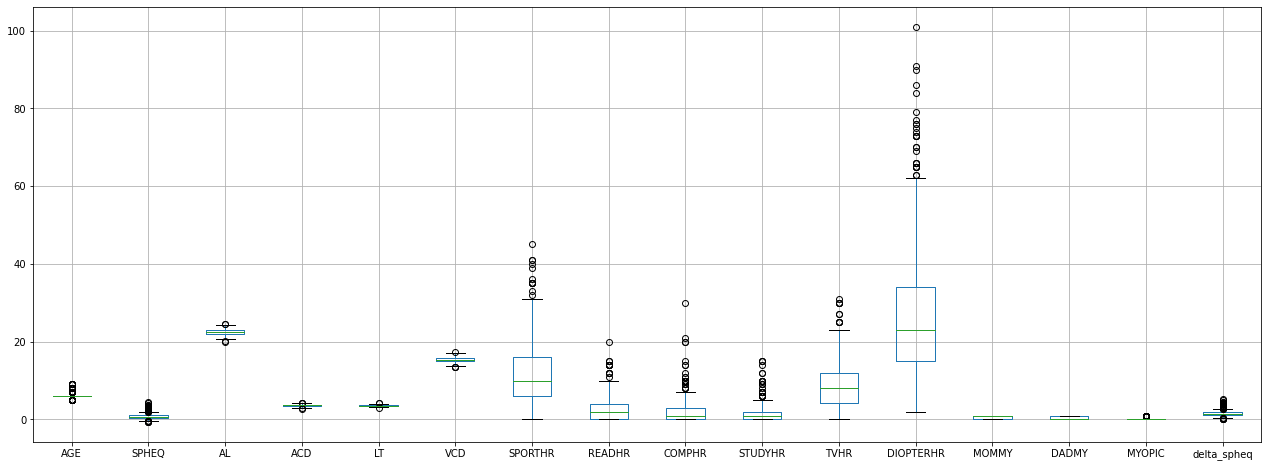

In [11]:
df.boxplot(figsize=(22,8))

In [12]:
feature_names = df_stats.columns
outlier_rows = []
for col in feature_names:
    iqr = df_stats.loc['75%', col] - df_stats.loc['25%', col]
    mean = df_stats.loc['mean', col]
    median = df_stats.loc['50%', col]
    ul = df_stats.loc['75%', col] + 1.5*iqr
    ll = df_stats.loc['25%', col] - 1.5*iqr
    outliers = df[ (df[col] < ll) | (df[col] > ul) ]
    num_outliers = len(outliers)
    outlier_list = outliers[col].to_list()
    print("--------------------------------\n")
    print(f'{col} has {num_outliers} outliers.  Outliers are {outlier_list}')
    if col != 'MYOPIC':
        outlier_rows.append(outliers.index.to_list())
# print(outlier_rows)

--------------------------------

AGE has 162 outliers.  Outliers are [5, 7, 7, 7, 8, 5, 7, 5, 8, 8, 8, 8, 5, 7, 9, 8, 7, 7, 7, 7, 7, 8, 5, 8, 7, 7, 7, 8, 7, 9, 7, 7, 7, 7, 7, 7, 5, 7, 8, 8, 8, 7, 7, 7, 7, 8, 7, 5, 7, 7, 7, 5, 7, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 8, 7, 8, 7, 7, 8, 8, 7, 7, 7, 7, 7, 7, 8, 5, 7, 9, 8, 7, 7, 5, 8, 7, 7, 7, 7, 5, 8, 8, 5, 7, 5, 7, 7, 8, 8, 8, 7, 5, 7, 7, 7, 8, 8, 5, 8, 7, 8, 7, 5, 7, 8, 7, 7, 8, 8, 8, 9, 8, 5, 8, 7, 8, 5, 7, 7, 7, 8, 9, 7, 7, 7, 8, 7, 8, 7, 8, 5, 7, 7, 8, 8, 8, 7, 5, 8, 7, 8, 7, 8, 7, 7, 5, 7, 7, 8, 8, 9]
--------------------------------

SPHEQ has 33 outliers.  Outliers are [2.184999943, -0.490999997, 3.302999973, 1.94599998, -0.467000008, 2.825999975, -0.600000024, 1.950999975, 2.28399992, 2.52699995, 3.490999937, -0.523999989, 2.565000057, -0.57099998, 3.151000023, 2.746000051, 2.687999964, 2.427000046, -0.501999974, 3.61500001, 3.421999931, 2.069000006, -0.699000001, 2.056999922, 2.941999912, 2.20600009, 4.228000164, 2.25999999, 3.09800

In [13]:
from functools import reduce
import operator

In [14]:
out = reduce(operator.concat, outlier_rows)
len(out)

368

In [15]:
# modifies list directly
out.sort()

# keep only unique values
outlier_index = set(out)

# rows that are outliers
len(outlier_index)

246

In [16]:
# total rows
len(df)

618

In [17]:
# percent of records remaining
per_remain = (len(df)-len(outlier_index))/len(df)*100
print(f'The non-outliers make up {round(per_remain)} percent of the total dataset.')

The non-outliers make up 60 percent of the total dataset.


In [18]:
# combine discrete events that are related to intense eye use
df['total_eye_activity'] = df['TVHR'] + df['COMPHR'] + df['STUDYHR'] + df['READHR']

In [19]:
# combine discrete events that seem to be negatively correlated (see below)
df['total_positive_screen'] = df['TVHR'] + df['STUDYHR'] + df['READHR']

In [20]:
# Only data that does not fall outside outlier range
filtered_df = df[~df.index.isin(out)]
filtered_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,delta_spheq,total_eye_activity,total_positive_screen
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,1.358,9,8
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,1.929,12,10
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0,2.494,28,26
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0,1.433,18,16
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0,2.022,8,8


In [21]:
filtered_df.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,delta_spheq,total_eye_activity,total_positive_screen
count,372.0,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,6.0,0.781419,22.413172,3.560038,3.553825,15.299651,11.150538,2.416667,1.446237,0.836022,8.524194,21.174731,0.491935,0.526882,0.131720,1.531419,13.223118,11.776882
std,0.0,0.440559,0.637733,0.216225,0.146790,0.634797,7.027012,2.504130,1.696615,1.070302,5.160179,10.479044,0.500608,0.499949,0.338642,0.440559,6.118436,5.800474
min,6.0,-0.342000,20.910000,2.972000,3.196000,13.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.408000,2.000000,0.000000
25%,6.0,0.503000,21.927500,3.410000,3.447000,14.877500,5.000000,0.000000,0.000000,0.000000,4.000000,14.000000,0.000000,0.000000,0.000000,1.253000,9.000000,7.000000
50%,6.0,0.770500,22.389999,3.556000,3.554000,15.240000,10.000000,2.000000,1.000000,1.000000,8.000000,19.000000,0.000000,1.000000,0.000000,1.520500,12.000000,11.000000
75%,6.0,1.039000,22.822500,3.704000,3.654000,15.770000,15.000000,4.000000,2.000000,1.000000,12.000000,28.000000,1.000000,1.000000,0.000000,1.789000,17.000000,16.000000
max,6.0,1.847000,24.110001,4.130000,3.940000,17.080000,30.000000,10.000000,7.000000,5.000000,23.000000,55.000000,1.000000,1.000000,1.000000,2.597000,34.000000,27.000000


In [22]:
# save data
filtered_df.iloc[:, 0:-3].to_csv('full_filtered_df.csv', index=False)

## Correlations and Scatter Plots
- Pearson is the easiest for two Continuous features
- Some articles indicate Point Biserial Correlation should be used for Continuous/Discrete and a Categorical features
-- The calculations come out to be the same as pearson
- I always thought Spearman's Rank Correlation was used for Continuous/Discrete and Categorical features
- Chi-Squared Test of Independence is used when there are two Categorical features being compared

### Features to investigate
Continuous Features
1.  SPHEQ
1.  AL
1.  ACD
1.  LT
1.  VCD

Discrete Features  (hr/wk)
1.  SPORTHR
1.  READHR
1.  COMPHR
1.  STUDYHR
1.  TVHR
1.  DIOPTERHR

Categorical Features  (T/F)
1.  MOMMY
1.  DADMY

Target (Categorical/Binary)
1.  MYOPIC

## Pearson Correlation

In [23]:
# no variation in age so no need to keep it
filtered_df.iloc[:,2:].corr()

,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,delta_spheq,total_eye_activity,total_positive_screen
AL,1.000000,0.390968,-0.275122,0.934691,0.079715,-0.032072,0.084609,0.020825,0.113066,0.066463,0.077248,-0.018613,0.058717,-0.272916,0.109336,0.090582
ACD,0.390968,1.000000,-0.241449,0.108296,0.081115,-0.084806,0.105948,0.003055,0.018229,-0.016577,0.158176,0.094391,0.145778,-0.236377,0.010578,-0.019832
LT,-0.275122,-0.241449,1.000000,-0.425302,-0.070866,0.136993,-0.002089,0.054855,-0.016910,0.106015,-0.010858,-0.073889,-0.028979,0.024612,0.050823,0.054220
VCD,0.934691,0.108296,-0.425302,1.000000,0.068879,-0.035415,0.049123,0.007215,0.111471,0.047620,0.025734,-0.033900,0.016139,-0.199701,0.094402,0.085209
SPORTHR,0.079715,0.081115,-0.070866,0.068879,1.000000,0.116671,0.019220,0.087153,0.206549,0.218280,-0.017277,-0.017267,-0.137483,0.072144,0.242526,0.250199
READHR,-0.032072,-0.084806,0.136993,-0.035415,0.116671,1.000000,-0.020408,0.162335,-0.017157,0.751581,0.016664,0.002871,0.005033,-0.041733,0.417545,0.446402
COMPHR,0.084609,0.105948,-0.002089,0.049123,0.019220,-0.020408,1.000000,-0.016001,0.065265,0.336417,0.023290,0.008064,-0.050975,0.012060,0.321188,0.046298
STUDYHR,0.020825,0.003055,0.054855,0.007215,0.087153,0.162335,-0.016001,1.000000,-0.074682,0.380833,0.040286,0.000704,0.015133,-0.013733,0.173948,0.188163
TVHR,0.113066,0.018229,-0.016910,0.111471,0.206549,-0.017157,0.065265,-0.074682,1.000000,0.478379,0.052247,-0.010178,0.039047,-0.035186,0.841394,0.868426
DIOPTERHR,0.066463,-0.016577,0.106015,0.047620,0.218280,0.751581,0.336417,0.380833,0.478379,1.000000,0.057560,-0.000127,0.010967,-0.047548,0.870966,0.820309


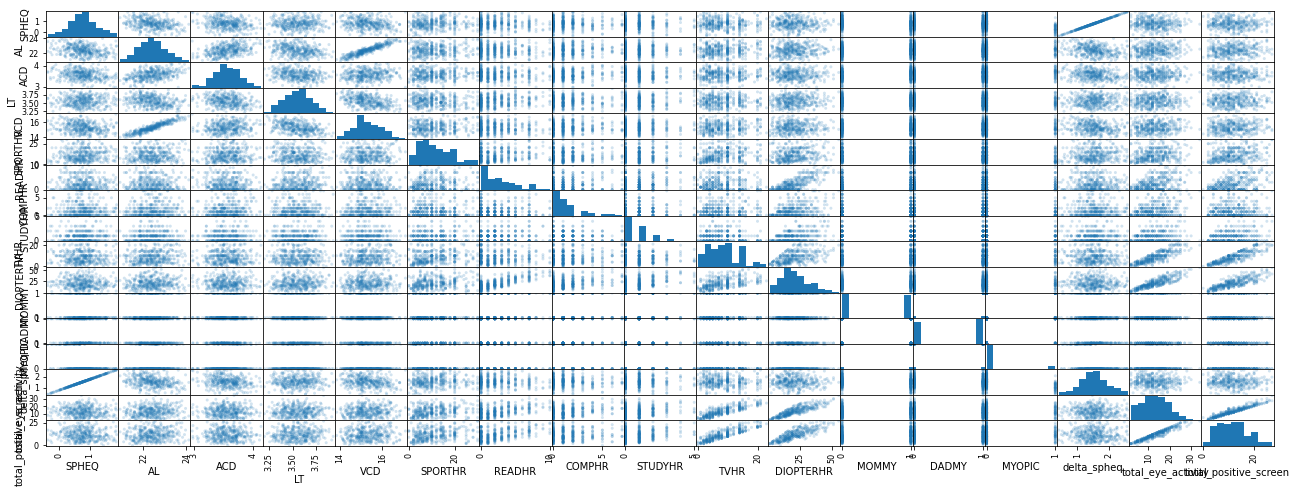

In [24]:
pd.plotting.scatter_matrix(filtered_df.iloc[:,1:], alpha=0.2, figsize=(22,8)); 

In [25]:
# Strong correlation between AL and VCD; Only one variable should be included in the model and probably VCD is better since it correlates better wtih MYOPIC.
# Check if variable is significant and check if Rank Correlation agrees.

In [26]:
# Looking only at MYOPIC correlation; this is probably not the best test - should use Kendall or Spearman Correlation
filtered_df.corr().loc[:,'MYOPIC']

AGE                           NaN
SPHEQ                   -0.425139
AL                       0.058717
ACD                      0.145778
LT                      -0.028979
VCD                      0.016139
SPORTHR                 -0.137483
READHR                   0.005033
COMPHR                  -0.050975
STUDYHR                  0.015133
TVHR                     0.039047
DIOPTERHR                0.010967
MOMMY                    0.157329
DADMY                    0.130275
MYOPIC                   1.000000
delta_spheq             -0.425139
total_eye_activity       0.023504
total_positive_screen    0.039702
Name: MYOPIC, dtype: float64

## Point Biserial (Discrete Variables and MYOPIC Categorical (Binary) )

In [27]:
# Using Point Biserial to estimate correlation
from scipy.stats import pointbiserialr

In [28]:
for col in filtered_df.columns:
    pbc = pointbiserialr(filtered_df[col], filtered_df['MYOPIC'])
    print(f'{col:<25} r:  {round(pbc.correlation,3)}, \t p-value: {round(pbc.pvalue,3)}')

AGE                       r:  nan, 	 p-value: nan
SPHEQ                     r:  -0.425, 	 p-value: 0.0
AL                        r:  0.059, 	 p-value: 0.259
ACD                       r:  0.146, 	 p-value: 0.005
LT                        r:  -0.029, 	 p-value: 0.577
VCD                       r:  0.016, 	 p-value: 0.756
SPORTHR                   r:  -0.137, 	 p-value: 0.008
READHR                    r:  0.005, 	 p-value: 0.923
COMPHR                    r:  -0.051, 	 p-value: 0.327
STUDYHR                   r:  0.015, 	 p-value: 0.771
TVHR                      r:  0.039, 	 p-value: 0.453
DIOPTERHR                 r:  0.011, 	 p-value: 0.833
MOMMY                     r:  0.157, 	 p-value: 0.002
DADMY                     r:  0.13, 	 p-value: 0.012
MYOPIC                    r:  1.0, 	 p-value: 0.0
delta_spheq               r:  -0.425, 	 p-value: 0.0
total_eye_activity        r:  0.024, 	 p-value: 0.651
total_positive_screen     r:  0.04, 	 p-value: 0.445


C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [29]:
## Note:  Pearson (product moment) and Point Biserial are the same
## Pearson and Point Biserial are probably not the best tests and some people might be recomminding them only becasue the target is binary and that could make a difference (special case)
# Only look at numeric types
# Indicates:  SPORTHR, DADMY, deleta_spheq are correlated

## Spearman's Rank Correlation
- Categorical (Ordinal) and Numerical

In [30]:
# Using Spearmans's rank to determine correlation
from scipy.stats import spearmanr

In [31]:
target = filtered_df.loc[:,'MYOPIC']
features = filtered_df.iloc[:,0:]  #.drop('MOMMY', axis=1).drop('DADMY', axis=1).drop('MYOPIC', axis=1)
features.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,delta_spheq,total_eye_activity,total_positive_screen
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,1.358,9,8
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,1.929,12,10
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0,2.494,28,26
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0,1.433,18,16
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0,2.022,8,8


In [32]:
for col in features.columns:
    coef, p = spearmanr(features[col], target)
    print(f'{col:<25} r:  {round(coef,3):<25} p-value: {round(p,3)}')

AGE                       r:  nan                       p-value: nan
SPHEQ                     r:  -0.42                     p-value: 0.0
AL                        r:  0.054                     p-value: 0.303
ACD                       r:  0.15                      p-value: 0.004
LT                        r:  -0.035                    p-value: 0.501
VCD                       r:  0.016                     p-value: 0.752
SPORTHR                   r:  -0.146                    p-value: 0.005
READHR                    r:  0.006                     p-value: 0.904
COMPHR                    r:  -0.051                    p-value: 0.33
STUDYHR                   r:  0.026                     p-value: 0.621
TVHR                      r:  0.037                     p-value: 0.476
DIOPTERHR                 r:  0.025                     p-value: 0.63
MOMMY                     r:  0.157                     p-value: 0.002
DADMY                     r:  0.13                      p-value: 0.012
MYOPIC      

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [33]:
# Only look at numeric types
# Indicates:  SPORTHR, DADMY, deleta_spheq are correlated

## Kendall Rank Correlation

In [34]:
from scipy.stats import kendalltau

In [35]:
for col in features.columns:
    corr, p = kendalltau(features[col], target)
    print(f'{col:<25} tau:  {round(corr,3):<25} p-value: {round(p,3)}')

AGE                       tau:  nan                       p-value: nan
SPHEQ                     tau:  -0.343                    p-value: 0.0
AL                        tau:  0.044                     p-value: 0.302
ACD                       tau:  0.123                     p-value: 0.004
LT                        tau:  -0.029                    p-value: 0.5
VCD                       tau:  0.013                     p-value: 0.752
SPORTHR                   tau:  -0.123                    p-value: 0.005
READHR                    tau:  0.006                     p-value: 0.904
COMPHR                    tau:  -0.046                    p-value: 0.33
STUDYHR                   tau:  0.024                     p-value: 0.621
TVHR                      tau:  0.031                     p-value: 0.475
DIOPTERHR                 tau:  0.021                     p-value: 0.629
MOMMY                     tau:  0.157                     p-value: 0.002
DADMY                     tau:  0.13                      

In [36]:
# Only look at numeric types (discrete interval/continuous)
# Indicates:  SPORTHR, DADMY, deleta_spheq are correlated
col_keep = ['ACD', 'LT', 'VCD', 'SPORTHR', 'DADMY', 'delta_spheq', 'total_positive_screen', 'MYOPIC']

## Chi-Squared for 2-Categorical Features

In [37]:
import scipy.stats as stats

for col in ['MOMMY', 'DADMY']:
    contingency = pd.crosstab(filtered_df[col], filtered_df['MYOPIC'])
    observed_values = contingency.values
    val = stats.chi2_contingency(contingency)
    print(f'{col:<25} chi-squared statistic: {round(val[0],3)} \t p-value: {round(val[1],3)} \t DOF: {val[2]}')


MOMMY                     chi-squared statistic: 8.301 	 p-value: 0.004 	 DOF: 1
DADMY                     chi-squared statistic: 5.565 	 p-value: 0.018 	 DOF: 1


In [38]:
# Only look at the categorical columns

# For MOMMY, since p-value (0.16) is greater than 0.05 then we can not reject Null hypothesis that the two variables are independent.  There is presumed no correlation.  
# This variable can be removed as a feature

# The opposite is true for DADMY

## VIF Feature Identification

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# This is a very simple method from https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [41]:
X = filtered_df.iloc[:,0:-1]
calc_vif(X)

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,AGE,0.000000e+00
1,SPHEQ,inf
2,AL,2.853649e+04
3,ACD,3.275006e+03
4,LT,1.514130e+03
5,VCD,2.831425e+04
6,SPORTHR,1.118519e+00
7,READHR,inf
8,COMPHR,inf
9,STUDYHR,inf


In [42]:
# Big numbers, need to reduce to only significant variables and each elimination

In [43]:
# Modify columns to decrease VIF
X_columns = ['SPHEQ', 'VCD', 'SPORTHR', 'DADMY', 'total_positive_screen']
X = filtered_df.loc[:,X_columns]
calc_vif(X)

,variables,VIF
0,SPHEQ,4.104321
1,VCD,10.967061
2,SPORTHR,3.803896
3,DADMY,2.128471
4,total_positive_screen,5.521774


In [44]:
# except for VCD, the other values have lowered to below the target value of 5

In [45]:
# The selections below match what the previous analysis indicated
X_columns = ['SPORTHR', 'DADMY', 'SPHEQ', 'total_positive_screen']
X = filtered_df.loc[:,X_columns]
calc_vif(X)

,variables,VIF
0,SPORTHR,3.481573
1,DADMY,1.816564
2,SPHEQ,2.844202
3,total_positive_screen,3.877994


Note:  SPHEQ has a much lower VIF then the nearly identical delta_spheq

## Create Reduced Dataset

In [46]:
# columns I think I should keep
# I kept ACD, LT, VCD, and total_positive_screen even though the corrections did support a relationship; I may remove these later
# VCD was kept but AL removed do to correlation
# total_positive_screen is the sum of hours per week from high eye intensity work
# delta_spheq was converted so negative value is considered myopic; I should also use delta_spheq as a Y because a negative value would be by definition myopia
# I need to know the final SPHEQ at the end time period or common time period.  There are several other helpful facts that could help with the model based on rate of changes.
col_keep = ['ACD', 'LT', 'VCD', 'SPORTHR', 'DADMY', 'delta_spheq', 'total_positive_screen', 'MYOPIC']

In [47]:
# save dataset of fewer columns
reduced_df = filtered_df.loc[:, col_keep]
reduced_df.head()

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen,MYOPIC
1,3.702,3.392,15.29,4,1,1.358,8,0
2,3.462,3.514,15.52,14,0,1.929,10,0
5,3.224,3.556,15.36,10,1,2.494,26,0
6,3.186,3.654,15.49,12,1,1.433,16,0
7,3.732,3.584,15.08,12,0,2.022,8,0


In [48]:
reduced_df.to_csv('reduced_filtered_df.csv', index=False)

## Review discrete features 
- I'm calling these discrete because there are limited options to what was allowed to be selected.
- The data is interval data

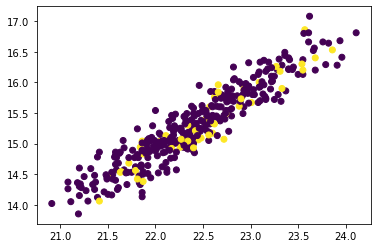

In [49]:
# VCD and AL look highly correlated
plt.scatter(filtered_df['AL'], filtered_df['VCD'], c=filtered_df['MYOPIC'])

In [50]:
filtered_df.corr()['SPORTHR']

AGE                           NaN
SPHEQ                    0.072144
AL                       0.079715
ACD                      0.081115
LT                      -0.070866
VCD                      0.068879
SPORTHR                  1.000000
READHR                   0.116671
COMPHR                   0.019220
STUDYHR                  0.087153
TVHR                     0.206549
DIOPTERHR                0.218280
MOMMY                   -0.017277
DADMY                   -0.017267
MYOPIC                  -0.137483
delta_spheq              0.072144
total_eye_activity       0.242526
total_positive_screen    0.250199
Name: SPORTHR, dtype: float64

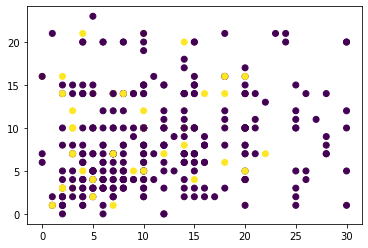

In [51]:
plt.scatter(filtered_df['SPORTHR'], filtered_df['TVHR'], c=filtered_df['MYOPIC'])

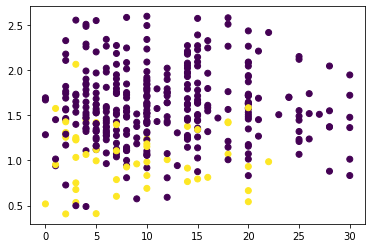

In [52]:
plt.scatter(filtered_df['SPORTHR'], filtered_df['delta_spheq'], c=filtered_df['MYOPIC'])

In [53]:
# As shown in other plots - most features show nearly random distribution except when SPHEQ or delta_spheq but this
# should be expected if SPHEQ is highly related to the target.

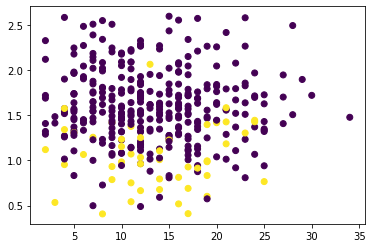

In [54]:
plt.scatter(filtered_df['total_eye_activity'], filtered_df['delta_spheq'], c=filtered_df['MYOPIC'])

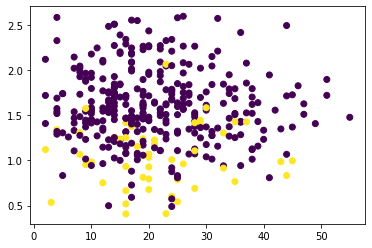

In [55]:
plt.scatter(filtered_df['DIOPTERHR'], filtered_df['delta_spheq'], c=filtered_df['MYOPIC'])

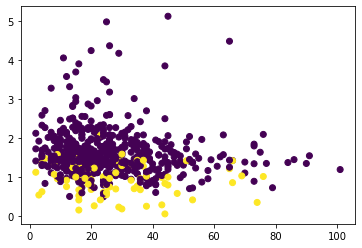

In [56]:
# interesting the difference between removing outliers (above) and not removing outliers (below)
plt.scatter(df['DIOPTERHR'], df['delta_spheq'], c=df['MYOPIC'])

## Discrete Features

In [57]:
filtered_df['SPORTHR'].value_counts()

10    44
20    32
5     26
14    26
15    25
4     24
7     24
8     23
6     21
2     19
12    17
3     16
18    11
25     9
16     9
9      7
30     6
1      5
28     5
21     4
0      4
26     3
11     3
22     2
24     2
13     2
17     1
23     1
27     1
Name: SPORTHR, dtype: int64

In [58]:
filtered_df['READHR'].value_counts()

0     115
2      60
1      54
3      38
4      32
7      28
5      24
6       7
8       6
10      5
9       3
Name: READHR, dtype: int64

In [59]:
filtered_df['COMPHR'].value_counts()


0    141
1     95
2     62
3     27
4     19
5     13
6      8
7      7
Name: COMPHR, dtype: int64

In [60]:
filtered_df['STUDYHR'].value_counts()

0    182
1    114
2     47
3     18
4      6
5      5
Name: STUDYHR, dtype: int64

In [61]:
filtered_df['TVHR'].value_counts()

10    61
14    35
7     34
4     33
5     31
3     30
8     22
2     19
6     19
15    14
1     13
20    13
16    10
12    10
21     7
11     6
9      5
0      4
17     2
23     1
19     1
18     1
13     1
Name: TVHR, dtype: int64

In [62]:
filtered_df['DIOPTERHR'].value_counts()

14    21
19    20
16    20
17    19
24    15
10    15
20    14
22    13
25    12
28    12
12    12
23    12
13    11
26    11
9     11
15    11
4      9
18     9
8      9
30     8
35     7
38     7
31     7
7      7
27     7
29     6
34     6
21     6
33     5
36     5
37     4
2      4
32     4
5      4
44     4
45     3
11     3
39     3
43     2
41     2
51     2
40     2
47     2
42     1
3      1
55     1
49     1
6      1
46     1
Name: DIOPTERHR, dtype: int64

## Categorical Featues

In [63]:
filtered_df['MOMMY'].value_counts()

0    189
1    183
Name: MOMMY, dtype: int64

In [64]:
filtered_df['DADMY'].value_counts()

1    196
0    176
Name: DADMY, dtype: int64

In [65]:
# Notice the 
filtered_df['MYOPIC'].value_counts()

0    323
1     49
Name: MYOPIC, dtype: int64